 ## Assignment 2: Irish Summers

a) Plot total summer rainfall versus year, and print the years with the driest and wettest summers   
(defining June 1st to August 31st as the summer period)  
_Hint: use | (or) instead of (and) to combine conditions for different months_

b) Find the single day in the database with the largest fluctuation in temperature.  
Plot the temperature fluctuation on this date as a function of year.

In [1]:
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 

#from collections is needed when summing rainfall from a list of tuples
#at least it was necessary for me if not using pandas
day, month, year, min_temp, max_temp, rainfall, windspeed = np.loadtxt('weather.csv', delimiter=',', skiprows=1,  unpack=True )
#relevant data set and labels denoted
day = day.astype(int)
month = month.astype(int)
year = year.astype(int)
summer= np.where((month==6)|(month==7)|(month==8) )
#summer is defined as a period of 3 months
year_summer=year[summer]
month_summer=month[summer]
rainfall_summer=rainfall[summer]
#the x[summer] argument implies values in a dataset provided summer is true

In [2]:

year_vs_rainfall_summer = []
#empty list into which will be fed specific values
zipped_summer_stats=zip(year_summer,rainfall_summer)
for something in zipped_summer_stats:
    year_vs_rainfall_summer.append(something)
#creates 2x2 coordinates for year provided summer is true and rainfall provided summer is true
#print(total_summer_rainfall)
#shows a large list of 2 value tuples, similar to coordinates


In [6]:

total_summer_rainfall = defaultdict(int) 
#defines rainfall to be an integer value and therefore an iterable value
for x, y in year_vs_rainfall_summer: 
    total_summer_rainfall[x] += y
#sums up rainfall over all duplicates of a certain year(year x) and adds these to the list total_summer_rainfall
#this is a list of equal length to the list for unique years


The wettest summer was 1958
The driest summer was 1975


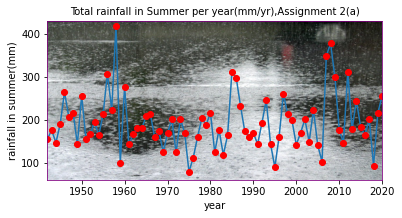

<Figure size 4320x5040 with 0 Axes>

In [7]:
x_val = [x[0] for x in (list(total_summer_rainfall.items()))]
y_val = [x[1] for x in (list(total_summer_rainfall.items()))]
#separating x and y values of each tuple in preparation for graphing
wettest_summer=max((list(total_summer_rainfall.items())), key=lambda x: x[1])
driest_summer=min(list(total_summer_rainfall.items()), key=lambda x: x[1])
#finds max and min values of list of tuples but specifies that it searches for these in 2nd column
print('The wettest summer was',wettest_summer[0])
print('The driest summer was',driest_summer[0])
#prints year of wettest and driest summer
import matplotlib.cbook as cbook
from matplotlib.pyplot import imread
#importing some visual processing libraries
rainfile = cbook.get_sample_data('/home/Benjamin/Downloads/rain.jpg')
#this address will vary depending on the name of the directory you save the image to
#reading image data from file, address I used given
img = imread(rainfile)
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.figure(figsize=(60,70))
ax.plot(x_val,y_val)
ax.plot(x_val,y_val,'ro')
ax.imshow(img, extent=[1942, 2020,60,430])
#creates a graph of year vs total summer rainfall with a rainy picture as a background
ax.set_xlabel('year',fontsize='10')
ax.set_ylabel('rainfall in summer(mm)',fontsize='10')
ax.set_aspect('0.1')
#sets the aspect of the images(ratio of horizontal to vertical component of image)
#otherwise image becomes squished and unreadable
ax.set_title('Total rainfall in Summer per year(mm/yr),Assignment 2(a)',fontsize='10')
#sets title of graph
ax.spines['bottom'].set_color('purple')
ax.spines['top'].set_color('purple')
ax.spines['left'].set_color('purple')
ax.spines['right'].set_color('purple')
#makes spines purple to make border stand out more
plt.show()
#shows image
#I have not added an image to each graph background as I am not sure this is what you meant by an "aesthetic graph"
#This is more experimental therefore


[ 2.9  2.   2.3 ...  9.9 12.2 11.8]
19.5 degrees Celsius
[2] / [6] / [2020]


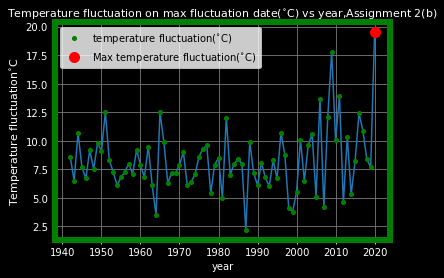

In [8]:
#part (b) of this assignment begins here
#tasked to find the single day in the database with largest fluctuation in temperature
#fluctuation refers to change, must make algorithm to find where temperature.max-temperature.min is largest
fluctuation= (max_temp-min_temp)
#print(fluctuation)
#run the above print to verify that fluctuation is correct
max_fluctuation=max(fluctuation)
#finds max value in fluctuation list
print(max_fluctuation,'degrees Celsius') 
#shows the max fluctuation in the output line
condition_max=np.where(fluctuation==max_fluctuation)
#supplies a condition that sorts values depending on whether max fluctuation is in them
day_condmax= day[condition_max]
month_condmax=month[condition_max]
year_condmax=year[condition_max]
#condition is applied to day,month, year and a single value is returned for each of these as expected
print(day_condmax,'/',month_condmax,'/',year_condmax)
#max temperature fluctuation found to be 02/06/2020
#can plot temperature fluctuation on this specific date as a function of year
date_condmax=np.where((day==day_condmax) & (month==month_condmax))
#defines condition where max fluctuation occurs
fluctuation_on_date=fluctuation[date_condmax]
unique_year=np.unique(year)
#creates values of fluctuation on the same date as max fluctuation for each year and unique values of year
fig=plt.figure(2)
ax = fig.add_subplot(111)
#creates new figure
ax.plot(unique_year,fluctuation_on_date)
ax.plot(unique_year,fluctuation_on_date,'go',markersize='4',label='temperature fluctuation($^{\circ}$C)')
ax.plot(year_condmax,max_fluctuation,'ro',markersize='10',label='Max temperature fluctuation($^{\circ}$C)')
#plots year vs fluctuation for specific date
#another point plot is made that denotes on this graph the location of max fluctuation from all years with a red dot
ax.set_xlabel('year',fontsize='10')
ax.set_ylabel('Temperature fluctuation$^{\circ}$C',fontsize='11')
#creates x and y labels
plt.legend(loc='best')
#places legend in the area with most available space
ax.set_title('Temperature fluctuation on max fluctuation date($^{\circ}$C) vs year,Assignment 2(b)',fontsize='11')
#creates title
ax.spines['bottom'].set_color('green')
ax.spines['top'].set_color('green')
ax.spines['left'].set_color('green')
ax.spines['right'].set_color('green')
ax.spines["bottom"].set_linewidth(6)
ax.spines["top"].set_linewidth(6)
ax.spines["left"].set_linewidth(6)
ax.spines["right"].set_linewidth(6)
#changes colour and thickness of spines
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
#makes x and y ticks visible against black background
plt.gcf().set_facecolor('black')
plt.grid(color='grey')
plt.show()
#shows graph